# Exercise 4 - Neural Networks Learning

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
import scipy.optimize #fmin_cg to train neural network
import itertools
from scipy.special import expit #Vectorized sigmoid function

%matplotlib inline
import seaborn as sns


# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# load MATLAB files
from scipy.io import loadmat

%matplotlib inline

### Load Data

In [24]:
data = loadmat('ex4data1.mat')
print(data.keys())

y = data['y']

# Add intercept
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('\nX:',X.shape, '(with intercept)')
print('y:',y.shape)


m,n = X.shape
print('\nNumber of features (n): %.0f'%(n))
print('Number of training examples (nm): %.0f'%(m))

weights = loadmat('ex4weights.mat')
weights.keys()

theta1, theta2 = weights['Theta1'], weights['Theta2']
print('\ntheta1 :', theta1.shape)
print('theta2 :', theta2.shape)
params = np.r_[theta1.ravel(), theta2.ravel()]
print('params :', params.shape)


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

X: (5000, 401) (with intercept)
y: (5000, 1)

Number of features (n): 401
Number of training examples (nm): 5000

theta1 : (25, 401)
theta2 : (10, 26)
params : (10285,)


### Display Sammples

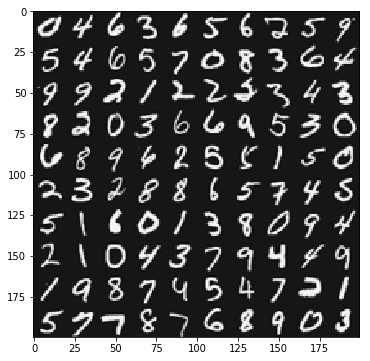

In [18]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    crates an image object from it, and returns it
    """
    width, height = 20, 20
    square = row[1:].reshape(width,height)
    return square.T
    
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20 x 20 image from each,
    then stitches them together into a 10 x 10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height * nrows, width * ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow * height : irow * height + iimg.shape[0], icol * width : icol * width + iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize = (6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img, cmap = cm.Greys_r)
    
displayData()


### Neural Networks - Feed Forward and Cost Function

the Neural Network will have 3 layers, a hidden layers adn and ouput layer. The inputs are pixel valuesof digit images. The images are 20 x 20, this gives 400 inputs layers, 401 including the bias unit


Input layer size = 400 (20 x 20 pixels) <br>
Hidden layer size = 25<br>
Number of labels or output layers = 10<br>

the values of each of the activation nodes ias as follows <br>
$$a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \Rightarrow a_1^{(2)} = g(z_1^{(2)})$$<br>
$$a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \Rightarrow a_2^{(2)} = g(z_2^{(2)})$$<br>
$$a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \Rightarrow a_3^{(2)} = g(z_3^{(2)})$$<br>
$$h_{\Theta}(x) = g(\Theta_{10}^{(2)}a_0 + \Theta_{11}^{(2)}a_1 + \Theta_{12}^{(1)}a_2. +\Theta_{13}^{(1)}a_3) = g(z^{(3)}) $$<br>

in vectorisation mode for settings $x = a^{(i)}$ we can write 
$$z^{(j)} = \Theta^{(j-1)}a^{(j-1)}$$

Vectorised implemetations of Forward Propogation:
$$a^{(1)} = x$$
$$z^{(2)} = \Theta^{(1)} a^{(1)}$$
$$a^{2} = g(z^{(2)}).... add... a_0^{(2)} = 1)$$
$$z^{(3)} = \Theta^{(2)}a^{(2)}$$
$$h_{\Theta}(x) = a^{(3)}  = g(z^{(3)})$$


Sigmoid gradient
$$g′(z)=g(z)(1−g(z))$$

where
$$g(z)=\frac{1}{1+e^{-z}}$$


Cost Function 
$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\big[y^{(i)}_{k} log(( h_\theta(x^{(i)}))_k)-(1-y^{(i)}_k)log(1-h_\theta(x^{(i)}))_k)\big]$$

Vectorised Cost Junction
$$ $$

In [5]:
L = 400 # Input layer size = 400 (20x20 pixels)
# Hidden layer size = 25
# Number of labels = 10
# Neural Networks - Feed Forward and Cost Function
input_layer = 400
hidden_layer = 25
output_layer = 10 
n_training_samples = X.shape[0]

def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

def sigmoidGradient(z):
    return(sigmoid(z) * (1 - sigmoid(z)))

#Neural Network Cost Function
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, features, classes, reg):
    
    theta1 = nn_params[0:(hidden_layer_size * (input_layer_size + 1))].reshape(hidden_layer_size,(input_layer_size + 1))
    theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):].reshape(num_labels,(hidden_layer_size + 1))

    m = features.shape[0]
    y_matrix = pd.get_dummies(classes.ravel()).as_matrix() 
    
    # Cost
    a1 = features # 5000x401
        
    z2 = theta1.dot(a1.T) # 25x401 * 401x5000 = 25x5000 
    a2 = np.c_[np.ones((features.shape[0],1)),sigmoid(z2.T)] # 5000x26 
    
    z3 = theta2.dot(a2.T) # 10x26 * 26x5000 = 10x5000 
    a3 = sigmoid(z3) # 10x5000
    
    J = -1 * (1/m) * np.sum((np.log(a3.T) * (y_matrix) + np.log(1 - a3).T * (1 - y_matrix))) + \
        (reg/(2 * m)) * (np.sum(np.square(theta1[:,1:])) + np.sum(np.square(theta2[:,1:])))

    # Gradients
    d3 = a3.T - y_matrix # 5000x10
    d2 = theta2[:,1:].T.dot(d3.T) * sigmoidGradient(z2) # 25x10 *10x5000 * 25x5000 = 25x5000
    
    delta1 = d2.dot(a1) # 25x5000 * 5000x401 = 25x401
    delta2 = d3.T.dot(a2) # 10x5000 *5000x26 = 10x26
    
    theta1_ = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_ = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    
    theta1_grad = delta1/m + (theta1_ * reg)/m
    theta2_grad = delta2/m + (theta2_ * reg)/m
    
    return(J, theta1_grad, theta2_grad)


### Regularisation


 
Regularized Cost Function
$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\bigg[y^{(i)}_{k} log(( h_\theta(x^{(i)}))_k)+(1-y^{(i)}_k)log(1-h_\theta(x^{(i)}))_k)\bigg] + \frac{\lambda}{2m}\bigg[\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}(\Theta_{j,k}^{(1)})^2(\Theta_{j,k}^{(2)})^2\bigg]$$


In [6]:
# Regularization parameter = 0
Lambda = 0
nnCostFunction(params, input_layer, 25, 10, X, y, Lambda)[0]

#print('For Lambda = %.0f, \n\tCost  = %.2f \n\t Theta1_grad = %.2f \n\t Theta2_grad = %.2f' %(Lambda, J, theta1_grad, theta2_grad ) )


# Regularization parameter = 1]
Lambda = 1
nnCostFunction(params, input_layer, 25, 10, X, y, Lambda)[0]


[sigmoidGradient(z) for z in [-1, -0.5, 0, 0.5, 1]]


[0.19661193324148185,
 0.23500371220159449,
 0.25,
 0.23500371220159449,
 0.19661193324148185]